In [15]:
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate

In [18]:
def kde_scipy(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scipy"""
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return kde.evaluate(x_grid)

In [19]:
def kde_statsmodels_u(x, x_grid, bandwidth=0.2, **kwargs):
    kde = KDEUnivariate(x)
    kde.fit(bw=bandwidth, **kwargs)
    return kde.evaluate(x_grid)

In [20]:
def kde_statsmodels_m(x, x_grid, bandwidth=0.2, **kwargs):
    kde = KDEMultivariate(x, bw=bandwidth * np.ones_like(x),
                          var_type='c', **kwargs)
    return kde.pdf(x_grid)

In [21]:
def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

In [8]:
kde_funcs = [kde_statsmodels_u, kde_statsmodels_m, kde_scipy, kde_sklearn]
kde_funcnames = ['Statsmodels-U', 'Statsmodels-M', 'Scipy', 'Scikit-learn']

print ("package Versions:")
import sklearn; print ("scikit-learn:",sklearn.__version__)
import scipy; print("scipy:",scipy.__version__)
import statsmodels; print("Statsmodels:", statsmodels.__version__)

package Versions:
scikit-learn: 0.23.2
scipy: 1.5.3
Statsmodels: 0.12.1


In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

NameError: name 'KDEUniveraite' is not defined

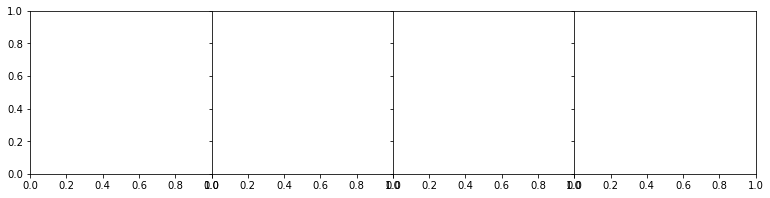

In [17]:
from scipy.stats.distributions import norm

x_grid = np.linspace(-4.5,3.5,1000)

np.random.seed(0)
x=np.concatenate([norm(-1,1.).rvs(400), 
                 norm(1,0.3).rvs(100)])
pdf_true=(0.8*norm(-1,1.).pdf(x_grid) + 
         0.2*norm(1,0.3).pdf(x_grid))

fig,ax = plt.subplots(1,4,sharey=True,
                     figsize=(13,3))
fig.subplots_adjust(wspace=0)

for i in range(4):
    pdf=kde_funcs[i](x,x_grid,bandwidth=0.2)
    ax[i].plot(x_grid,pdf,color='blue',alpha=0.5,lw=3)
    ax[i].fill(x_grid,pdf_true,ec='gray',fc='gray',alpha=0.4)
    ax[i].set_xlim(-4.5,3.5)
    
from IPython.display import HTML
HTML("<font color='#666666'>Gray = True underlying distribution</font><br>"
     "<font color='6666ff'>Blue = KDE model distribution (500 pts)</font>")